In [1]:
import numpy as np
from matplotlib import pyplot as plt


data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery = [4.5, 1]

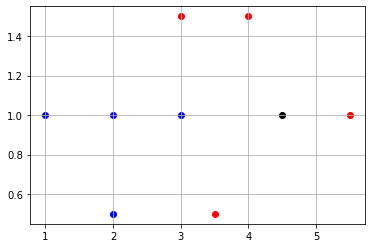

In [2]:
plt.grid()
for x in data:
    if x[2] == 0:
        c = "blue"
    else:
        c = "red"
    plt.scatter(x[0], x[1], color=c)
plt.scatter(mystery[0], mystery[1], color='black')

    Neural Network
          o    output
        /   \  w1, w2 b
       o     o inputs
        

In [3]:
def sigmoid(n):
    return 1/(1+np.exp(-n))
# change in sigmoid

def d_sig(x):
    return sigmoid(x) * (1-sigmoid(x))

d_sig(-2)

0.1049935854035065

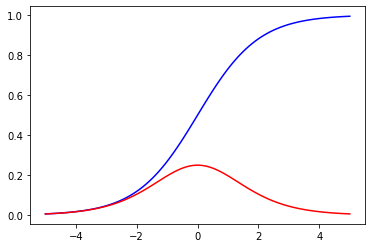

In [4]:
x = np.linspace(-5, 5, 100)
y = sigmoid(x)
z = d_sig(x)

# ploting
font = {"family":"Times New Roman", "size": 15, 'color': 'darkblue'}
# plt.text(0, .2, "Highest peak", fontdict=font)
plt.plot(x, y, color='blue')
plt.plot(x, z, color='red')
plt.show()

before: 0.4785419327664773 0.07340046379066723 0.11074004045350483 0.9119418794169475
After: 2.6508271218536033 1.0880029072522797 -8.421968637027119 0.1841755178032658
3.2776651812079645e-05


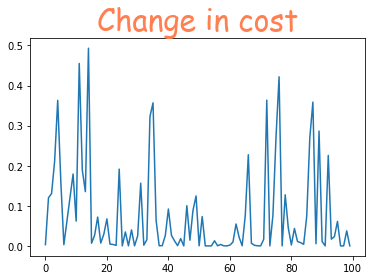

In [5]:
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()
cost = []
learn_r = 0.1
def cal(i1, i2, we1, we2, bios):
    pred = ((i1*we1) + (i2*we2)) + bios
    return sigmoid(pred)

print('before:', w1, w2, b, cal(mystery[0], mystery[1], w1, w2, b))
# training loop
iteration = 10000
for i in range(iteration):
    ind = np.random.randint(len(data))
    pt = data[ind]
    
    z = ((pt[0]*w1) + (pt[1]*w2)) + b
    ans = sigmoid(z)
#     cost
    err = (ans-pt[2])**2

    if i % 100 == 0:
        #     update the cost list
        
        cost.append(err)
        
#     minimize cost

#     change in cost(derivative of the err equation)

    dydc = 2*(ans-pt[2])
#     change in sigmoid(derivative of the sigmoid function)

    dydsig = d_sig(z)
#     product of the two

    dydx = dydc * dydsig
#     derivative of z with respect to w1

    dzdw1 = pt[0]
    dzdw2 = pt[1]
    dzdb = 1
#     derivative of the cost(err) with respect to w1, w2 and b

    dcdw1 = dydx *dzdw1
    dcdw2 = dydx *dzdw2
    dcdb = dydx *dzdb
#     Updating the first weight, second weight and the bios

    w1 -= (dcdw1 * learn_r)
    w2 -= (dcdw2 * learn_r)
    b -=  (dcdb * learn_r)


predp = sigmoid(((2*w1) + (1.5*w2)) + b)

print('After:', w1, w2, b, predp)

plt.plot(range(len(cost)), cost)    
style ={'family': "cursive", "size": 30, "color": "coral"}
plt.title("Change in cost", fontdict=style)
print(cost[len(cost)-1])
plt.show()

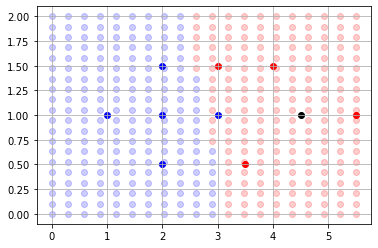

In [6]:
plt.grid()
c = 'red'
for x in np.linspace(0, 5.5, 20):
    for y in np.linspace(0, 2, 20):   
        out = cal(x, y, w1, w2, b)
        if out > 0.5:
            c = "red"
        else:
            c = 'blue'
        plt.scatter(x, y, alpha=.2, color=c)

for x in data:
    if x[2] == 0:
        c = "blue"
    else:
        c = "red"
    plt.scatter(x[0], x[1], color=c)
col = "black"

if predp <= 0.5:
    col = "blue"
else:
    col = "red"
plt.scatter(2, 1.5, color=col)
plt.scatter(mystery[0], mystery[1], color='black')
plt.show()